<a href="https://colab.research.google.com/github/aaronmj7/Kaggle-challenge-team-2/blob/main/Kaggle_challenge_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set seaborn theme for plots
sns.set_theme()
np.random.seed(73)

In [3]:
# Load data as a dataframe from our github organization
data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group-G/Kaggle-challenge-team-2/main/train.csv'
df = pd.read_csv(data)

# Display first few rows
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df['PassengerId'].astype(str)
df.sort_values(by='PassengerId')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Drop Passenger ID, Name and Transported(target variable) columns
try:
  df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
except:
    pass

df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:

try:
    df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
except KeyError:
    pass

df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    pass

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Cabin_num     8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['bool', 'object']).columns

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Categorical features: Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck',
       'Cabin_num', 'Side'],
      dtype='object')


## EDA

In [ ]:
print("Unique Values in Categorical Features:\n")
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

Unique Values in Categorical Features:

HomePlanet: ['Europa' 'Earth' 'Mars' nan]
CryoSleep: [False True nan]
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP: [False True nan]
Transported: [False  True]
Deck: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Cabin_num: ['0' '1' '2' ... '1892' '1893' '1894']
Side: ['P' 'S' nan]


Transported
True     4378
False    4315
Name: count, dtype: int64


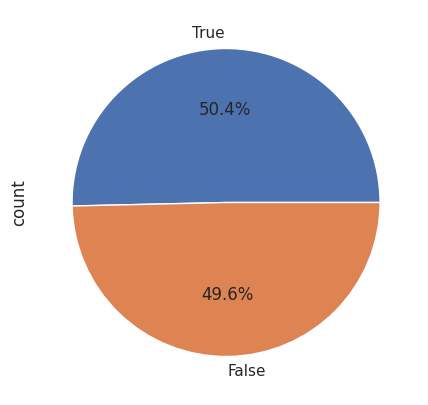

In [ ]:
plot_df = df.Transported.value_counts()
print(plot_df)

plot_df.plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5), title='')
plt.show()

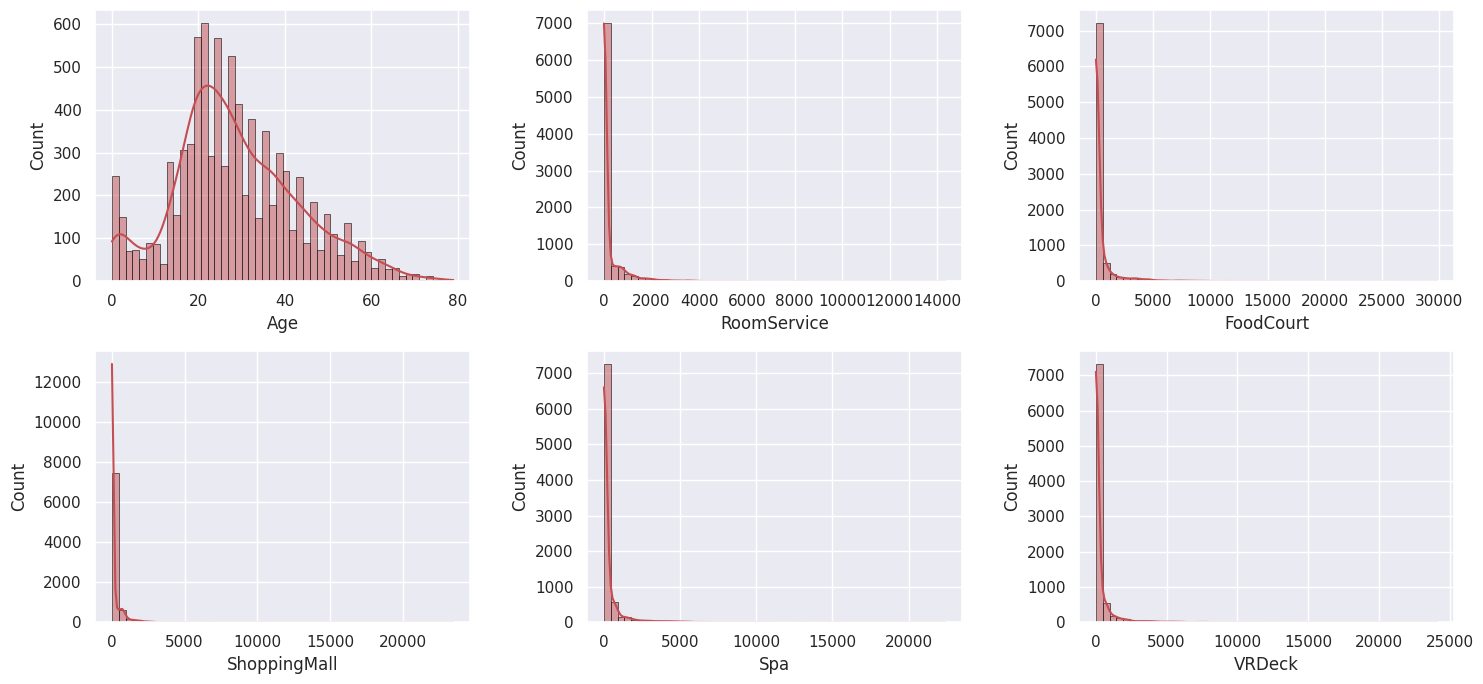

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

sns.histplot(df['Age'], color='r', edgecolor='k', kde=True, bins=50, ax=ax[0,0])
sns.histplot(df['RoomService'], color='r', edgecolor='k', kde=True, bins=50, ax=ax[0,1])
sns.histplot(df['FoodCourt'], color='r', edgecolor='k', kde=True, bins=50, ax=ax[0,2])
sns.histplot(df['ShoppingMall'], color='r', edgecolor='k', kde=True, bins=50, ax=ax[1,0])
sns.histplot(df['Spa'], color='r', edgecolor='k', kde=True, bins=50, ax=ax[1,1])
sns.histplot(df['VRDeck'], color='r', edgecolor='k', kde=True, bins=50, ax=ax[1,2])
plt.tight_layout()
plt.show()

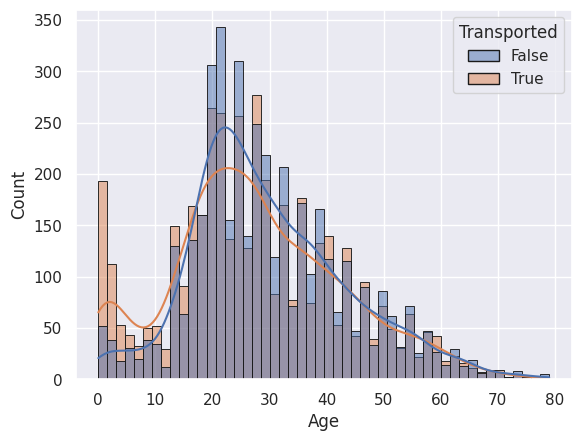

In [ ]:
sns.histplot(data=df, x='Age', kde=True, edgecolor='k', bins=50, hue='Transported')
plt.show()

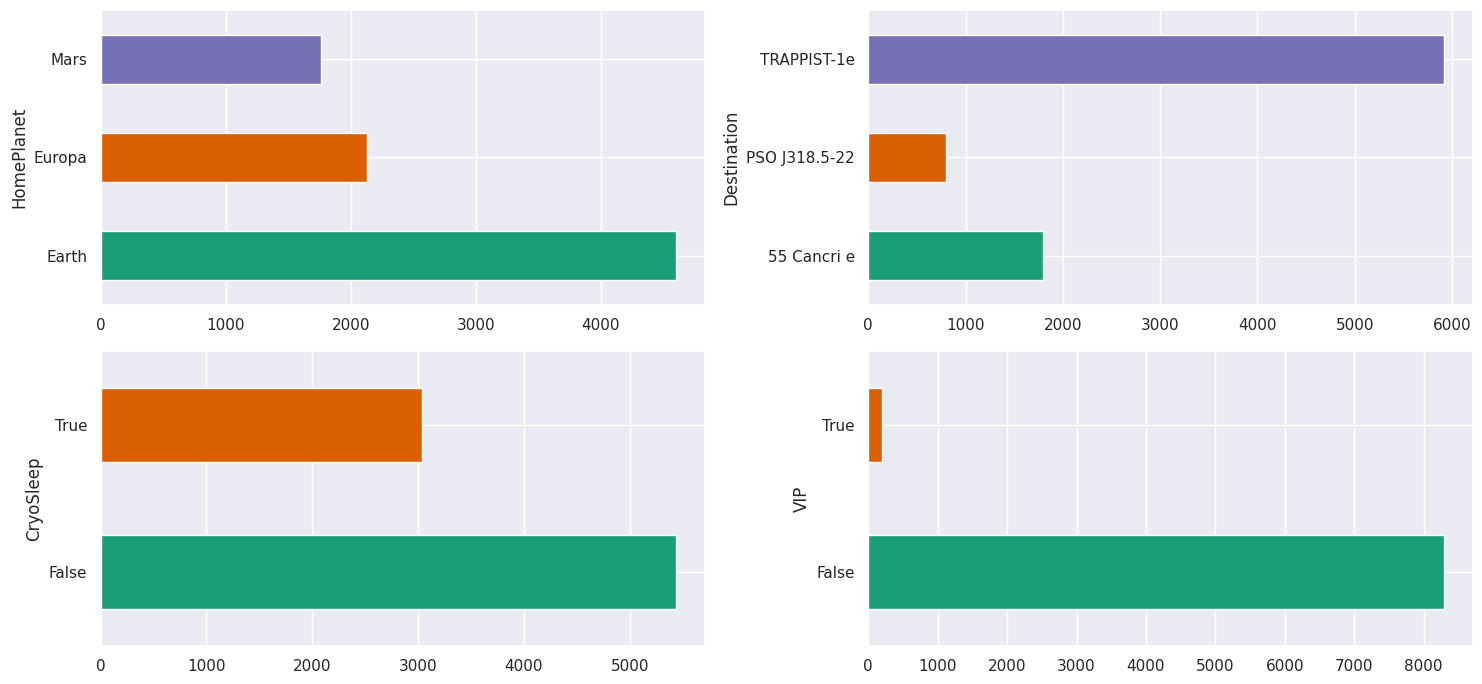

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

df.groupby('HomePlanet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax[0,0])
df.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax[0,1])
df.groupby('CryoSleep').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax[1,0])
df.groupby('VIP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax[1,1])
plt.tight_layout()
plt.show()

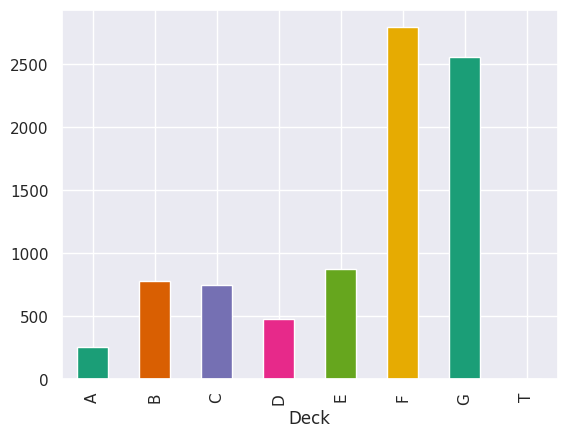

In [ ]:
df.groupby('Deck').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

<Axes: xlabel='Cabin_num', ylabel='Count'>

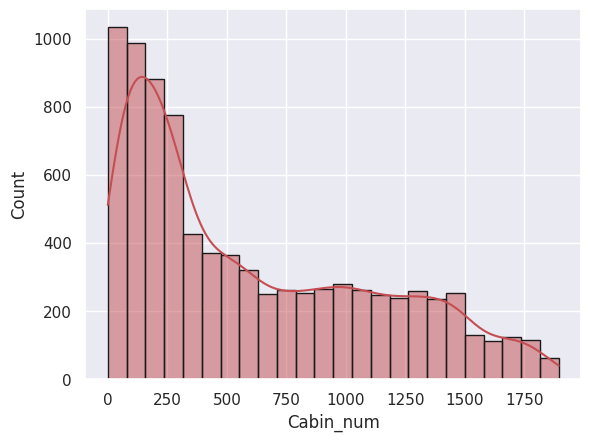

In [ ]:
sns.histplot(df['Cabin_num'].dropna().astype(int), color='r', edgecolor='k', kde=True)

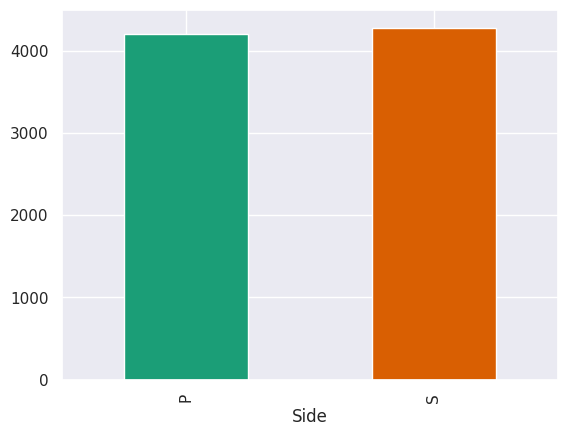

In [ ]:
df.groupby('Side').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

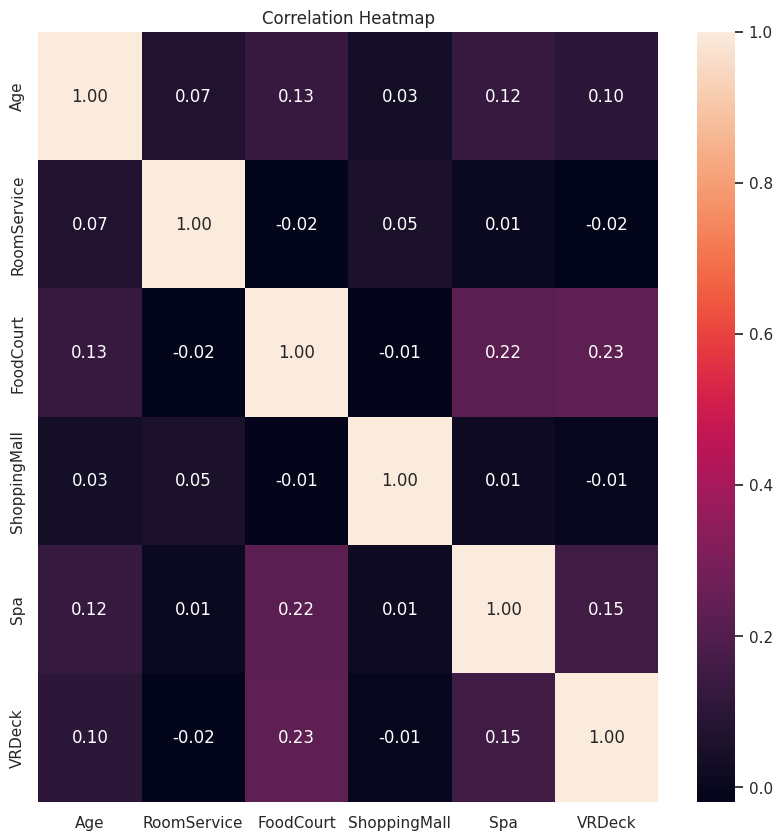

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Pre-Processing

### Imputation

In [ ]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [ ]:
numerical_features, categorical_features

(Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'),
 Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck',
        'Cabin_num', 'Side'],
       dtype='object'))

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [ ]:
numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_columns:
    df[col].fillna(0, inplace=True)

df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [ ]:
'''# For categorical columns, we can use the most frequent value for imputation
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
'''

"# For categorical columns, we can use the most frequent value for imputation\ncolumns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']\n\nfor col in columns:\n    mode = df[col].mode()[0]\n    df[col].fillna(mode, inplace=True)\n"

In [ ]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            199
Cabin_num       199
Side            199
dtype: int64

In [ ]:
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']
for col in columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [ ]:
'''
df.loc[df['Side'].isnull(), 'Side'] = np.random.choice(df['Side'].dropna())
df.isnull().sum()
'''

"\ndf.loc[df['Side'].isnull(), 'Side'] = np.random.choice(df['Side'].dropna())\ndf.isnull().sum()\n"

### Encoding

In [ ]:
# Change boolean values into integer
df['CryoSleep'] = df['CryoSleep'].fillna(False).astype(int)
df['VIP'] = df['VIP'].fillna(False).astype(int)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
# Apply one-hot encoding
cols= ['HomePlanet', 'Destination', 'Deck', 'Cabin_num', 'Side']
df = pd.get_dummies(df, columns=cols, prefix=cols, dtype=int)
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_num_992,Cabin_num_993,Cabin_num_994,Cabin_num_995,Cabin_num_996,Cabin_num_997,Cabin_num_998,Cabin_num_999,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,0,0,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,0,0,0,0,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,1


### Scaling

In [ ]:
# Import StandardScaler for scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_num_992,Cabin_num_993,Cabin_num_994,Cabin_num_995,Cabin_num_996,Cabin_num_997,Cabin_num_998,Cabin_num_999,Side_P,Side_S
0,0,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,True,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,False,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,False,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,True,1,...,0,0,0,0,0,0,0,0,0,1


###More

In [ ]:
'''
df['Expenditure'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
df.columns
'''

"\ndf['Expenditure'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']\ndf.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)\ndf.columns\n"

## Model

In [ ]:
# Load data as a dataframe from our github organization
data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group-G/Kaggle-challenge-team-2/main/test.csv'
test_df = pd.read_csv(data)

# Display first few rows
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)



numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_columns:
    test_df[col].fillna(0, inplace=True)


'''
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in columns:
    mode = test_df[col].mode()[0]
    test_df[col].fillna(mode, inplace=True)
'''


test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)



test_df = test_df.drop('Cabin', axis=1)



columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']
for col in columns:
    mode = test_df[col].mode()[0]
    test_df[col].fillna(mode, inplace=True)


'''
test_df.loc[test_df['Side'].isnull(), 'Side'] = np.random.choice(test_df['Side'].dropna())
'''

test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False).astype(int)
test_df['VIP'] = test_df['VIP'].fillna(False).astype(int)


cols= ['HomePlanet', 'Destination', 'Deck', 'Cabin_num', 'Side']
test_df = pd.get_dummies(test_df, columns=cols, prefix=cols, dtype=int)


test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])

test_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Cabin_num_99,Cabin_num_990,Cabin_num_992,Cabin_num_993,Cabin_num_994,Cabin_num_995,Cabin_num_996,Cabin_num_997,Side_P,Side_S
0,0013_01,1,0.341772,0,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning,...,0,0,0,0,0,0,0,0,0,1
1,0018_01,0,0.240506,0,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers,...,0,0,0,0,0,0,0,0,0,1
2,0019_01,1,0.392405,0,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus,...,0,0,0,0,0,0,0,0,0,1
3,0021_01,0,0.481013,0,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter,...,0,0,0,0,0,0,0,0,0,1
4,0023_01,0,0.253165,0,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
missing_features = set(df.columns) - set(test_df.columns)
extra_features = set(test_df.columns) - set(df.columns)

for feature in missing_features:
    test_df[feature] = 0

# Next, add extra features to 'df' with values 0
for feature in extra_features:
    df[feature] = 0

<ipython-input-377-ec26b9151465>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[feature] = 0
<ipython-input-377-ec26b9151465>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[feature] = 0
<ipython-input-377-ec26b9151465>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[featu

In [ ]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_df.drop('Transported', axis=1, inplace=True)


In [ ]:
X = df.drop('Transported', axis=1)
X = X.sort_index(axis=1)
y = df['Transported'].astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logreg.score(X, y)

0.8109973541930289

## XAI

In [ ]:
#!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
'''
import shap

# Choose a masker (e.g., shap.TabularMasker)
masker = shap.maskers.Independent(X)  # Replace X with your background data

# Initialize the explainer with the model and masker
explainer = shap.TreeExplainer(logreg.predict_proba, masker=masker)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)
'''

PermutationExplainer explainer:   0%|          | 18/4277 [08:47<36:40:56, 31.01s/it]


KeyboardInterrupt: 

In [ ]:
submission_id = test_df.PassengerId

X_test = test_df.drop(['PassengerId', 'Name'], axis=1)
X_test = X_test.sort_index(axis=1)
predictions = logreg.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': predictions})

In [ ]:
output.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [ ]:
output['Transported'] = output['Transported'].astype(bool)
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
output.to_csv('submission1.csv', index=False)

## Network

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform

distance_vector = pdist(df[numerical_features], 'euclidean')
distance_matrix = squareform(distance_vector)

# Convert to networkx graph
undirected_graph = nx.from_numpy_array(distance_matrix)

# Create a minimum spanning tree (MST)
mst = nx.minimum_spanning_tree(undirected_graph)

In [ ]:
# Set up info for plot
node_list = list(mst.nodes())
node_color = df.loc[node_list, 'Transported'].map({True: 'red', False: 'blue'})
pos = nx.kamada_kawai_layout(mst)

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(mst, pos, node_size=100, node_color=node_color, with_labels=True)
plt.title('Minimum Spanning Tree')
plt.show()

In [ ]:
import plotly.express as px

fig = px.treemap(df.dropna(axis=0), path=['Transported','HomePlanet','Destination'], color='Age')
fig.show()

In [ ]:

fig = px.treemap(df.dropna(axis=0), path=['Transported', 'Deck', 'Side'], color='Age')
fig.show()